<a href="https://colab.research.google.com/github/R3Mi91/Aplicaci-n-a-las-Matem-ticas-Financieras/blob/main/Codigo_AplMatFinancieras_Markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portafolio con Markovitz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Cargamos los datos

In [2]:
path_femsa = "https://raw.githubusercontent.com/R3Mi91/Aplicaci-n-a-las-Matem-ticas-Financieras/refs/heads/main/Datos%20hist%C3%B3ricos%20FEMSAUBD.csv"
path_walmex = "https://raw.githubusercontent.com/R3Mi91/Aplicaci-n-a-las-Matem-ticas-Financieras/refs/heads/main/Datos%20hist%C3%B3ricos%20WALMEX.csv"
path_gcc = "https://raw.githubusercontent.com/R3Mi91/Aplicaci-n-a-las-Matem-ticas-Financieras/refs/heads/main/Datos%20hist%C3%B3ricos%20GCC.csv"
path_gentera = "https://raw.githubusercontent.com/R3Mi91/Aplicaci-n-a-las-Matem-ticas-Financieras/refs/heads/main/Datos%20hist%C3%B3ricos%20GENTERA.csv"
path_grumab = "https://raw.githubusercontent.com/R3Mi91/Aplicaci-n-a-las-Matem-ticas-Financieras/refs/heads/main/Datos%20hist%C3%B3ricos%20GRUMAB.csv"

In [3]:
df_femsa = pd.read_csv(path_femsa, delimiter = ',')
df_walmex = pd.read_csv(path_walmex, delimiter = ',')
df_gcc = pd.read_csv(path_gcc, delimiter = ',')
df_gentera = pd.read_csv(path_gentera, delimiter = ',')
df_grumab = pd.read_csv(path_grumab, delimiter = ',')


In [4]:
dfs = {
    'femsa': df_femsa,
    'walmex': df_walmex,
    'gcc': df_gcc,
    'gentera': df_gentera,
    'grumab': df_grumab
}

empresas = ['femsa','walmex','gcc','gentera','grumab']

df_gcc

,Fecha,Cierre,Apertura,Maximo,Minimo,Vol.,% var.
0,20.05.2025,179.10,181.76,182.97,179.07,192.00K,0.32%
1,19.05.2025,178.52,177.15,182.23,176.63,240.59K,0.10%
2,16.05.2025,178.35,182.00,182.00,176.20,176.03K,-1.75%
3,15.05.2025,181.53,172.85,184.48,172.85,980.57K,4.66%
4,14.05.2025,173.44,176.00,176.61,172.95,476.68K,-1.44%
...,...,...,...,...,...,...,...
1254,26.05.2020,76.45,73.78,76.93,73.06,567.08K,4.03%
1255,25.05.2020,73.49,71.64,74.02,71.64,240.48K,3.04%
1256,22.05.2020,71.32,70.01,72.71,68.49,380.13K,-1.19%
1257,21.05.2020,72.18,70.47,72.63,69.01,264.53K,1.78%


In [5]:
for name, df in dfs.items():
    df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)

In [6]:
for name, df in dfs.items():
    df.columns = df.columns.str.strip()

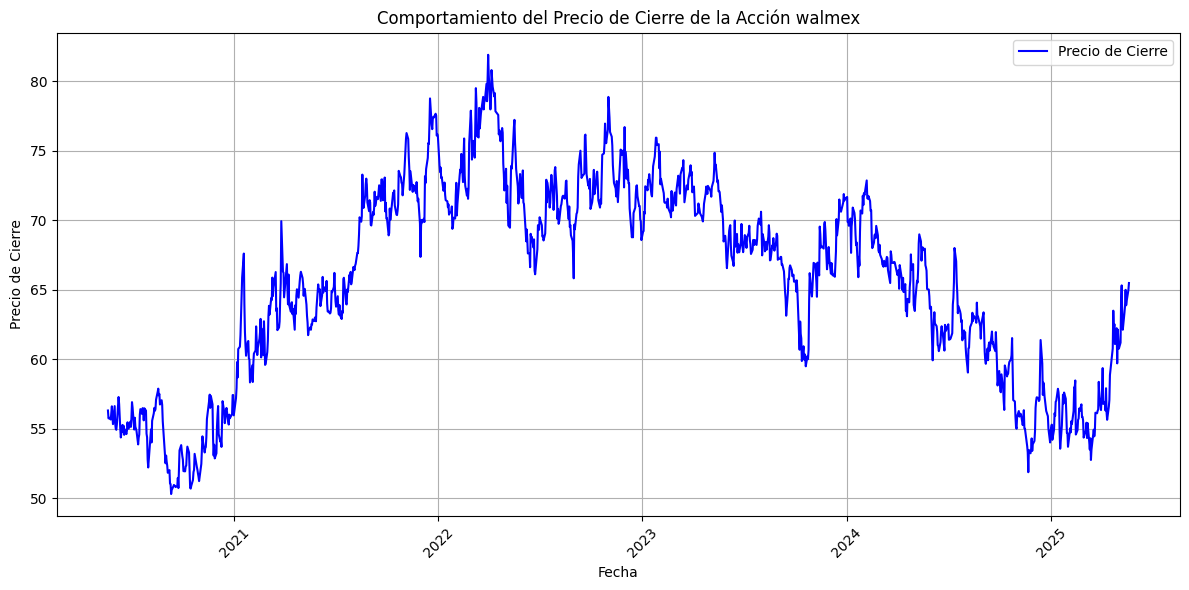

In [7]:
empresa = 'walmex'
plt.figure(figsize=(12,6))
plt.plot(df_walmex['Fecha'], df_walmex['Cierre'], color='blue', label='Precio de Cierre')
plt.title(f'Comportamiento del Precio de Cierre de la Acción {empresa}')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

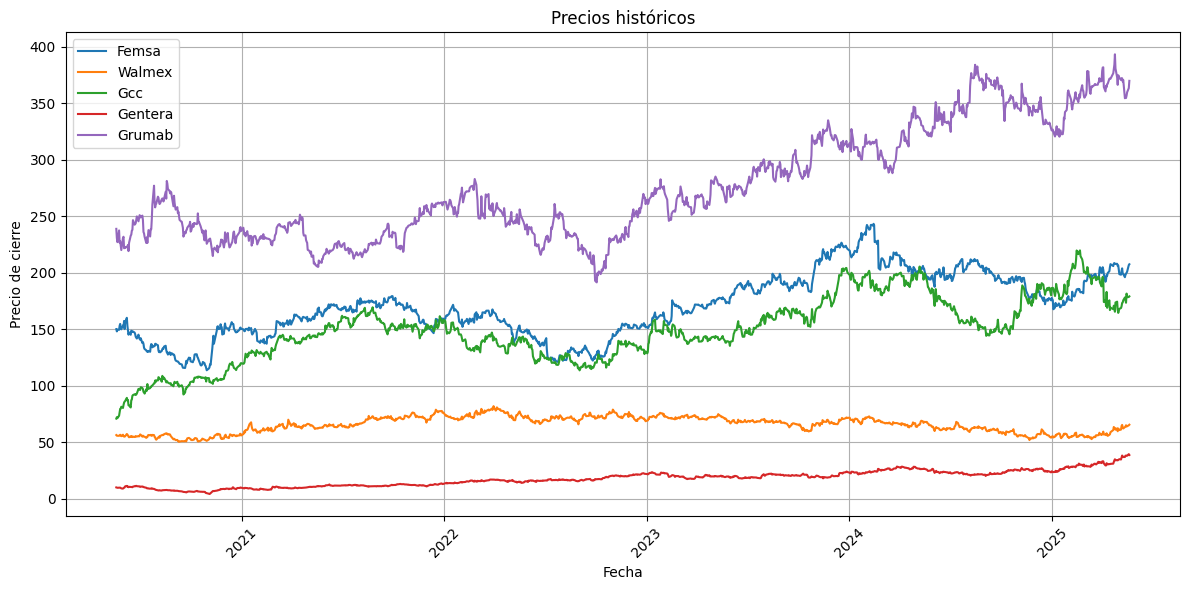

In [8]:
plt.figure(figsize=(12, 6))
for empresa in empresas:
    df = dfs[empresa]
    plt.plot(df['Fecha'], df['Cierre'], label=empresa.capitalize())

plt.title('Precios históricos')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
inv_total = 1_000_000
print(f"Nuestra inversión total es de: ${inv_total:,.2f}\n")
print("Distribución del capital por empresa:\n")

porcentajes = [20, 20, 20, 20, 20]
asignaciones = []

for empresa, porcentaje in zip(empresas, porcentajes):
    capital = inv_total * (porcentaje / 100)
    asignaciones.append(capital)
    print(f"{empresa.capitalize():<10} | {porcentaje:>3}% asignado | Capital: ${capital:,.2f}")

print("\nResumen total:")
print(" + ".join([f"${asig:,.2f}" for asig in asignaciones]) + f" = ${sum(asignaciones):,.2f}")


Nuestra inversión total es de: $1,000,000.00

Distribución del capital por empresa:

Femsa      |  20% asignado | Capital: $200,000.00
Walmex     |  20% asignado | Capital: $200,000.00
Gcc        |  20% asignado | Capital: $200,000.00
Gentera    |  20% asignado | Capital: $200,000.00
Grumab     |  20% asignado | Capital: $200,000.00

Resumen total:
$200,000.00 + $200,000.00 + $200,000.00 + $200,000.00 + $200,000.00 = $1,000,000.00


## Rendimientos diarios

In [10]:
for name, df in dfs.items():
    df['Rendimientos'] = (df['Cierre'] - df['Cierre'].shift(1)) / df['Cierre'].shift(1)


## Valor de cierre promedio por mes

In [11]:
# Aseguramos que la columna 'Date' esté en formato datetime y sea el índice
for df in [df_femsa, df_walmex, df_gcc, df_gentera, df_grumab]:
    df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
    df.set_index('Fecha', inplace=True)

dfs = {
    'femsa': df_femsa,
    'walmex': df_walmex,
    'gcc': df_gcc,
    'gentera': df_gentera,
    'grumab': df_grumab
}

# Diccionario para almacenar promedios mensuales
monthly_averages = {}

# Calcular promedio mensual con frecuencia de inicio de mes ('MS')
for name, df in dfs.items():
    monthly_avg = df['Cierre'].resample('MS').mean()
    monthly_averages[name] = monthly_avg

# Crear DataFrame de resultados
result_df = pd.DataFrame(monthly_averages)

# Añadir columna de periodos
result_df['Periodos'] = range(1, len(result_df) + 1)

# Reordenar columnas
result_df = result_df[['Periodos'] + list(monthly_averages.keys())]

# Mostrar resultados
print(result_df)

            Periodos       femsa     walmex         gcc    gentera      grumab
Fecha                                                                         
2020-05-01         1  150.683750  55.948750   75.626250   9.695000  229.022500
2020-06-01         2  148.583636  55.337955   88.355455  10.565455  234.240455
2020-07-01         3  135.206087  55.300435   98.682174   9.417391  245.218261
2020-08-01         4  130.703810  55.894286  104.208571   7.481905  267.908571
2020-09-01         5  121.156190  51.791905   99.836667   6.487143  246.889048
...              ...         ...        ...         ...        ...         ...
2025-01-01        57  172.827273  55.975000  183.665909  25.968182  333.278636
2025-02-01        58  183.027895  55.982632  209.496842  29.172632  355.285263
2025-03-01        59  197.135000  55.215000  196.198000  30.238500  367.068000
2025-04-01        60  203.180500  59.057500  174.744000  32.145000  373.730500
2025-05-01        61  200.696923  63.680000  174.979

## Riesgo individual por empresa

In [12]:
empresas = ['femsa','walmex','gcc','gentera','grumab']

# Calcular rendimientos mensuales a partir de precios mensuales
monthly_returns = result_df[empresas].pct_change().dropna()

# Rendimiento esperado y riesgo
expected_returns = monthly_returns.mean()
individual_risks = monthly_returns.std()

# Expresarlo en porcentaje
expected_returns_percentage = expected_returns * 100
individual_risks_percentage = individual_risks * 100

# Mostrar resultados
print("\n📈 Rendimiento esperado (promedio) de cada acción:")
print(expected_returns_percentage.map("{:.2f}%".format))

print("\n⚠️ Riesgo individual (desviación estándar) de cada acción:")
print(individual_risks_percentage.map("{:.2f}%".format))


📈 Rendimiento esperado (promedio) de cada acción:
femsa      0.61%
walmex     0.29%
gcc        1.60%
gentera    2.64%
grumab     0.90%
dtype: object

⚠️ Riesgo individual (desviación estándar) de cada acción:
femsa      5.31%
walmex     3.87%
gcc        6.31%
gentera    8.72%
grumab     4.98%
dtype: object


## Rendimiento del portafolio

In [13]:
# Total invertido (por si acaso)
total_investment = sum(asignaciones)

# Ponderaciones del portafolio (en el mismo orden que la lista de empresas)
weights = np.array(asignaciones) / total_investment

# Rendimiento esperado del portafolio (suma ponderada de rendimientos esperados)
portfolio_return = np.dot(expected_returns[empresas], weights)

# Riesgo total del portafolio usando la matriz de covarianza
cov_matrix = monthly_returns[empresas].cov()
portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Mostrar resultados
print("📈 Rendimiento total del portafolio:")
print("{:.2f}%".format(portfolio_return * 100))

print("\n⚠️ Riesgo total del portafolio:")
print("{:.2f}%".format(portfolio_risk * 100))

📈 Rendimiento total del portafolio:
1.21%

⚠️ Riesgo total del portafolio:
3.45%


## Matriz de covarianzas

In [14]:
# Calcular la matriz de covarianza de los rendimientos
cov_matrix = monthly_returns.cov()

# Mostrar la matriz de covarianza
print("\nMatriz de Covarianza:")
print(cov_matrix)


Matriz de Covarianza:
            femsa    walmex       gcc   gentera    grumab
femsa    0.002823  0.000620  0.000639  0.001657  0.000381
walmex   0.000620  0.001496  0.000353  0.000551  0.000334
gcc      0.000639  0.000353  0.003978  0.001124  0.000469
gentera  0.001657  0.000551  0.001124  0.007595 -0.000429
grumab   0.000381  0.000334  0.000469 -0.000429  0.002482


## Matriz de correlación

In [15]:
# Calcular la matriz de correlación de los rendimientos
corr_matrix = monthly_returns.corr()

# Mostrar la matriz de correlación
print("\nMatriz de Correlación:")
print(corr_matrix)



Matriz de Correlación:
            femsa    walmex       gcc   gentera    grumab
femsa    1.000000  0.301676  0.190640  0.357735  0.143738
walmex   0.301676  1.000000  0.144902  0.163579  0.173495
gcc      0.190640  0.144902  1.000000  0.204434  0.149302
gentera  0.357735  0.163579  0.204434  1.000000 -0.098774
grumab   0.143738  0.173495  0.149302 -0.098774  1.000000


## Frontera eficiente

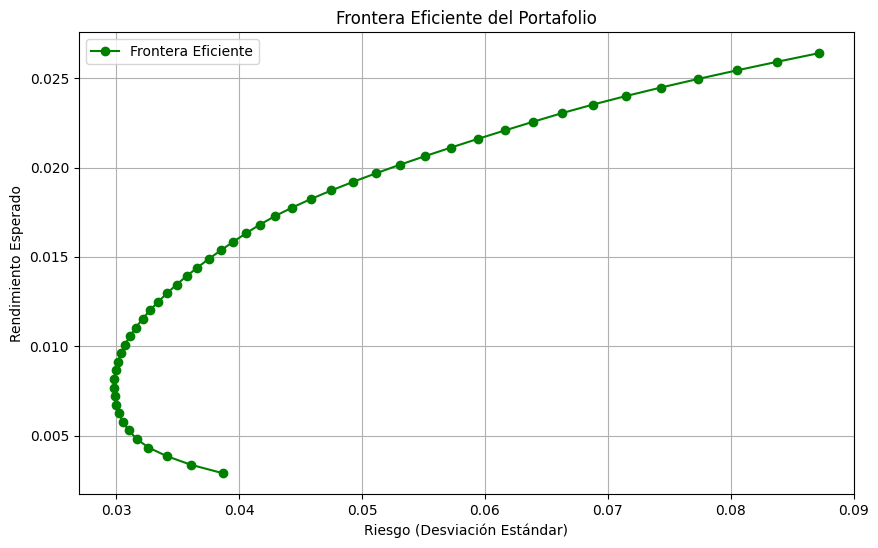

In [16]:
tickers = empresas

# Función de rendimiento del portafolio
def portfolio_return(weights):
    return np.dot(expected_returns, weights)

# Función de riesgo del portafolio
def portfolio_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Función de optimización: minimizar el riesgo dado un rendimiento objetivo
def minimize_risk(weights, target_return):
    return portfolio_risk(weights)

# Restricciones: pesos deben sumar 1
bounds = tuple((0, 1) for _ in range(len(tickers)))
initial_weights = np.array([1/len(tickers)] * len(tickers))

# Generar la frontera eficiente para un rango de rendimientos objetivo
target_returns = np.linspace(expected_returns.min(), expected_returns.max(), 50)
efficient_portfolios = []

for target in target_returns:
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # pesos suman 1
        {'type': 'eq', 'fun': lambda w: portfolio_return(w) - target}  # rendimiento objetivo
    )
    result = minimize(minimize_risk, initial_weights, args=(target,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_portfolios.append(result)

# Extraer los rendimientos y riesgos de la frontera eficiente
returns = [portfolio_return(p['x']) for p in efficient_portfolios]
risks = [portfolio_risk(p['x']) for p in efficient_portfolios]

# Graficar la frontera eficiente
plt.figure(figsize=(10, 6))
plt.plot(risks, returns, 'g-', marker='o', label='Frontera Eficiente')
plt.xlabel('Riesgo (Desviación Estándar)')
plt.ylabel('Rendimiento Esperado')
plt.title('Frontera Eficiente del Portafolio')
plt.grid(True)
plt.legend()
plt.show()

## Portafolio óptimo

In [17]:
# Tasa libre de riesgo (anual 2%, convertida a mensual)
risk_free_rate = 0.02 / 12

# Calcular el índice de Sharpe para cada portafolio en la frontera eficiente
sharpe_ratios = [(returns[i] - risk_free_rate) / risks[i] for i in range(len(returns))]

# Encontrar el índice del portafolio con mayor Sharpe
max_sharpe_idx = np.argmax(sharpe_ratios)
optimal_portfolio = efficient_portfolios[max_sharpe_idx]

# Extraer las ponderaciones del portafolio óptimo
optimal_weights = optimal_portfolio['x']

# Mostrar las nuevas ponderaciones
print("\n📊 Ponderaciones óptimas de cada acción en el portafolio con mayor Sharpe:")
for empresa, weight in zip(empresas, optimal_weights):
    print(f"{empresa.capitalize():<10}: {weight:.2%}")

# Mostrar el rendimiento y el riesgo del portafolio óptimo
optimal_return = returns[max_sharpe_idx]
optimal_risk = risks[max_sharpe_idx]

print("\n📈 Rendimiento esperado del portafolio óptimo:")
print(f"{optimal_return:.2%}")

print("\n⚠️ Riesgo (desviación estándar) del portafolio óptimo:")
print(f"{optimal_risk:.2%}")


📊 Ponderaciones óptimas de cada acción en el portafolio con mayor Sharpe:
Femsa     : 0.00%
Walmex    : 0.00%
Gcc       : 27.99%
Gentera   : 36.36%
Grumab    : 35.65%

📈 Rendimiento esperado del portafolio óptimo:
1.73%

⚠️ Riesgo (desviación estándar) del portafolio óptimo:
4.29%
